In [98]:
library(scales)
library(ggtreeExtra)
library(ape)
library(ggtree)
library(treeio)
library(cowplot)
library(phylolm)
library(ggplot2)
library(stringr)
library(dplyr)
library(tidyr)
library(RColorBrewer)
library(phytools)
library(ggnewscale)
library(svglite)
library(randomcoloR)

workingDir<-'/path/to/hcom2-invertons/'

In [99]:
keep.tips <- function(tree, keep) {
  ape::drop.tip(tree, setdiff(tree$tip.label, keep))
}
showlabeledtree <- function(tree){
    ggtree(tree, layout="circular")+geom_tiplab(geom="label", offset=1, hjust=.5)
}
showtree <- function(tree){
    ggtree(tree, layout="circular")
}

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Saving 6.67 x 6.67 in image


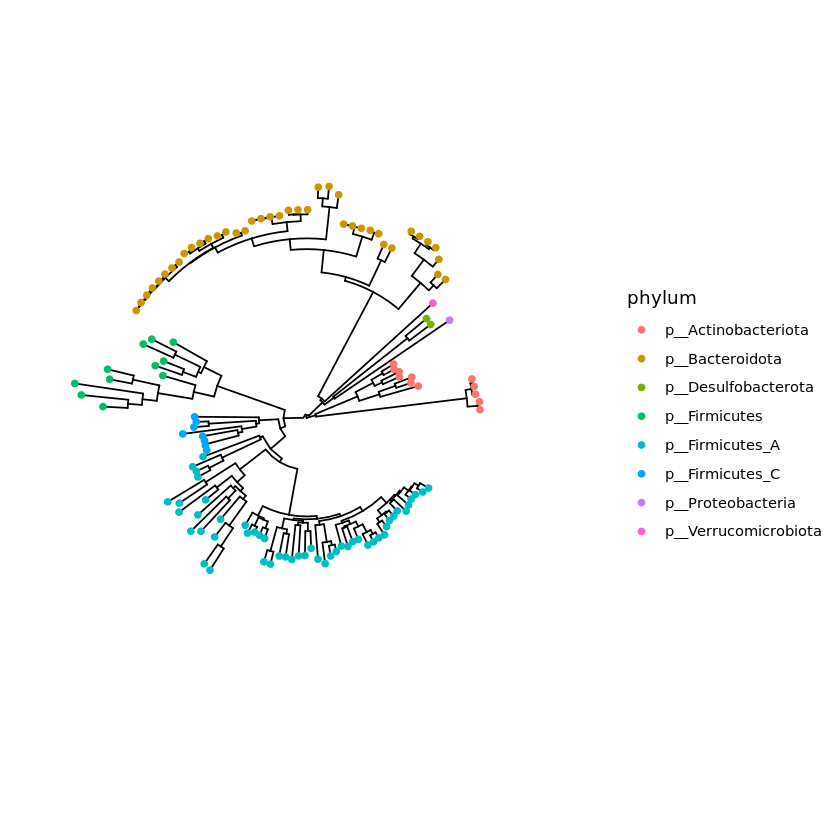

In [100]:
gtdbtree <- read.tree(file.path(workingDir,"data","trees","gtdbtk.bac120.classify.tree"))
strainDf<-read.csv(file.path(workingDir,"data","supplementaryTables","TableS1.csv.gz"))

p <- ggtree(keep.tips(gtdbtree,strainDf$Strain), layout="fan", open.angle=30) %<+% strainDf
p1 <- p +
  geom_tippoint(aes(color = phylum))  +
  theme(legend.position = 'right')

p1
 
ggsave(file.path(workingDir,"figures","hcom2Tree.pdf"))


In [101]:
tree <- read.tree(file.path(workingDir,"data","trees","invertonsIRseqs.dnd"))
invertonTaxDf<-read.csv(file.path(workingDir,"data","supplementaryTables","TableS5.csv.gz"))
invertonTaxDf$ID2<-invertonTaxDf$inverton.ID
invertonTaxDf<-invertonTaxDf %>%
  mutate(across('ID2', str_replace, ':', '_'));
invertonTaxDf<-separate_wider_delim(invertonTaxDf, cols = inverton.ID, delim = "__", names = c("abbrev", "pos"),cols_remove = FALSE)
invertonTaxDf<-merge(x = invertonTaxDf, y = strainDf, by = "abbrev", all.x = TRUE)
invertonTaxDf[,'inverton.group']=as.character(invertonTaxDf[,'inverton.group'])
group2<-invertonTaxDf$inverton.group
for (x in 1:length(group2)) {
    if (group2[x] %in% group2[1:x-1]){
        group2[x]<-""
    }
}
invertonTaxDf$inverton.group2 <-group2
rownames(invertonTaxDf) <- invertonTaxDf$ID2

cols<-colnames(invertonTaxDf)
cols<-cols[cols != "ID2"]


invertonTaxDf<-invertonTaxDf[,c('ID2',cols)]

invertonTaxDf

,ID2,abbrev,pos,inverton.ID,inverton.group,intersectGene,IR.sequence,full.sequence,Strain,contigs,BioSample,BioProject,domain,phylum,class,order,family,genus,species,inverton.group2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A-ca-DSM-14662__0_1004493-1004504-1004588-1004599,A-ca-DSM-14662__0_1004493-1004504-1004588-1004599,A-ca-DSM-14662,0:1004493-1004504-1004588-1004599,A-ca-DSM-14662__0:1004493-1004504-1004588-1004599,121,True,AGTTCCGCAGA,AGTTCCGCAGACGGATCAATGGCTGCTGTGACCTTAAAGAGGATGATTTCATAAAAAAGGTATCGATCGATGTGGATATGCCGATTGACTATATTTCTGCGGAACT,Anaerostipes-caccae-DSM-14662,A-ca-DSM-14662__0,SAMN20222639,PRJNA746600,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Lachnospirales,f__Lachnospiraceae,g__Anaerostipes,s__Anaerostipes caccae,121
A-ca-DSM-14662__0_1478876-1478887-1479013-1479024,A-ca-DSM-14662__0_1478876-1478887-1479013-1479024,A-ca-DSM-14662,0:1478876-1478887-1479013-1479024,A-ca-DSM-14662__0:1478876-1478887-1479013-1479024,115,True,CCGGATCAGAT,CCGGATCAGATCGAGAGGATCAATGAGGCAAAGAAGGCAGGAGAGACCGGAAACTTTCCGCTGACGATGAAGGCGCCGGGAGGAGCAGAGGTGACGGTCCAGGTGTATTTACGGGATCAGGGGACGGACAGTGCCAAATCTGATCCGG,Anaerostipes-caccae-DSM-14662,A-ca-DSM-14662__0,SAMN20222639,PRJNA746600,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Lachnospirales,f__Lachnospiraceae,g__Anaerostipes,s__Anaerostipes caccae,115
A-ca-DSM-14662__0_3206486-3206497-3206581-3206592,A-ca-DSM-14662__0_3206486-3206497-3206581-3206592,A-ca-DSM-14662,0:3206486-3206497-3206581-3206592,A-ca-DSM-14662__0:3206486-3206497-3206581-3206592,26,True,TGCGGCTGGCA,TGCGGCTGGCACCGATCACCGTAATCTCTTCTCCCAAAAGACTGCCAAGCTTCTCATTGAGAATCCCTTCTATGGTCGTATCCTTTGGCTGTATCTGCCAGCCGCA,Anaerostipes-caccae-DSM-14662,A-ca-DSM-14662__0,SAMN20222639,PRJNA746600,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Lachnospirales,f__Lachnospiraceae,g__Anaerostipes,s__Anaerostipes caccae,26
A-ca-DSM-14662__0_442585-442598-442691-442704,A-ca-DSM-14662__0_442585-442598-442691-442704,A-ca-DSM-14662,0:442585-442598-442691-442704,A-ca-DSM-14662__0:442585-442598-442691-442704,117,True,TTCATGAATCCGC,TTCATGAATCCGCAGGAATCAATACACAGCTTTTAGGGCTGATCGGGGATACCTCCAAGGTCGATGTGGACCACGTGATGGCAAATGACATTGTGGAGACCGTGCAGCGGATTCAGGAA,Anaerostipes-caccae-DSM-14662,A-ca-DSM-14662__0,SAMN20222639,PRJNA746600,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Lachnospirales,f__Lachnospiraceae,g__Anaerostipes,s__Anaerostipes caccae,117
A-co-DSM-17241__0_3279180-3279202-3279415-3279437,A-co-DSM-17241__0_3279180-3279202-3279415-3279437,A-co-DSM-17241,0:3279180-3279202-3279415-3279437,A-co-DSM-17241__0:3279180-3279202-3279415-3279437,139,False,ACATAATTTCCGTTATGTTGTA,ACATAATTTCCGTTATGTTGTACTTTGCCTGCTCCGCAGGACTCCGCAATCGTCATTATACTACATAGCTTGTCAAAATAGCAATACCCTTTGCCAAATAAAGCCCTCCCTTTCAGCTTTCATGCGCAGATTTCAGACCGGCCGAGGAAATTTTCCGACCGGTCTATGTGTGCACCCTTTTTATTTGTCGGCGAAACGGCAGGCAGTTTCTAAACGAAGCCAGCGGTCTGCATAATACAACATAACGGAAATTATGT,Anaerotruncus-colihominis-DSM-17241,A-co-DSM-17241__0,SAMN20222640,PRJNA746600,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Oscillospirales,f__Ruminococcaceae,g__Anaerotruncus,s__Anaerotruncus colihominis,139
A-co-DSM-17241__0_374216-374228-374270-374282,A-co-DSM-17241__0_374216-374228-374270-374282,A-co-DSM-17241,0:374216-374228-374270-374282,A-co-DSM-17241__0:374216-374228-374270-374282,26,True,CTGCGCCTGCGG,CTGCGCCTGCGGCGGCCCCATGCTGAGGACCGTCACGCTGCCGCCGTGTTCCTCCCGCAGGCGCAG,Anaerotruncus-colihominis-DSM-17241,A-co-DSM-17241__0,SAMN20222640,PRJNA746600,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Oscillospirales,f__Ruminococcaceae,g__Anaerotruncus,s__Anaerotruncus colihominis,
A-eq-DSM-19450__0_1050698-1050710-1050837-1050849,A-eq-DSM-19450__0_1050698-1050710-1050837-1050849,A-eq-DSM-19450,0:1050698-1050710-1050837-1050849,A-eq-DSM-19450__0:1050698-1050710-1050837-1050849,42,True,ACGGCCGCTTCC,ACGGCCGCTTCCGGGCGCTGTGGCACCGCGGCGTGCGCGCGGTGCTGCGCGAGCTGCCGGGCAACACGGAGCTGGCCGAGCAGACCGAGGAGATGCGCTGGCTGCAGACGGCCACGCGCACCTATGCCGTGGAGCATTTGGAAGCGGCCGT,Adlercreutzia-equolifa

Saving 6.67 x 6.67 in image


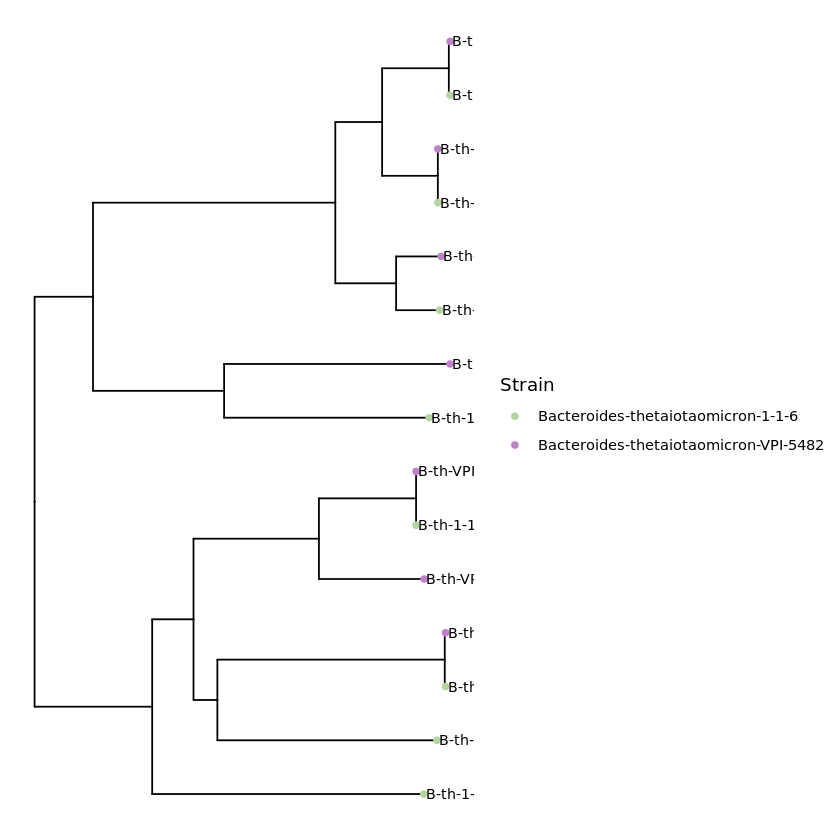

In [102]:
subInvertonTaxDf<-invertonTaxDf[((invertonTaxDf$inverton.group==as.character(136))|(invertonTaxDf$inverton.group==as.character(131))|(invertonTaxDf$inverton.group==as.character(126)))&(invertonTaxDf$species=="s__Bacteroides thetaiotaomicron"),]
p <- ggtree(keep.tips(tree,subInvertonTaxDf$ID2)) %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = Strain))  + scale_color_manual(values=distinctColorPalette(length(unique(subInvertonTaxDf$Strain))))+
  theme(legend.position = 'right') + geom_tiplab(aes(label=inverton.ID),size =3) 
p1
ggsave(file.path(workingDir,"figures","invertonsGroup126-131-136-Btheta.pdf"))


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


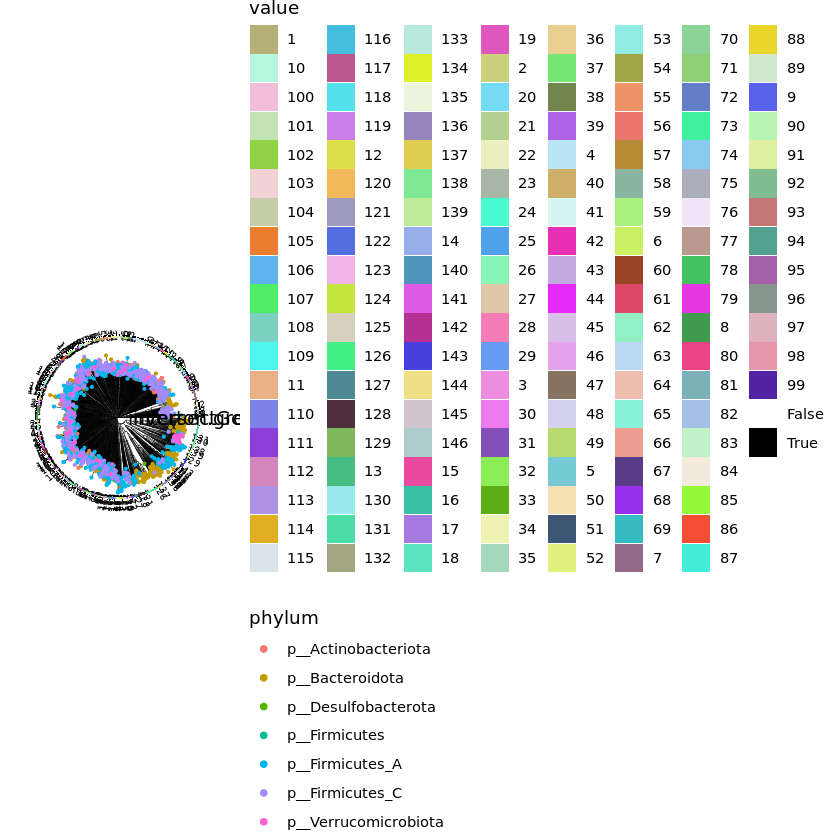

In [103]:
p <- ggtree(keep.tips(tree,invertonTaxDf$ID2), layout="circular",aes(size=I(.15))) %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = phylum,size=I(.5)))  +
  theme(legend.position = 'right') + geom_tiplab(aes(label=inverton.group2),size =2,align=TRUE,linetype = NULL)

gheatmap(p1, invertonTaxDf[c('inverton.group','intersectGene')],
               width = 0.05, color = NA,offset=.015) +scale_fill_manual(values=c(distinctColorPalette(length(unique(invertonTaxDf$inverton.group))),c('#FFFFFF','#000000')))
ggsave(file.path(workingDir,"figures","invertonsTree.pdf"),
      device = "pdf", width = 15, height = 30 , units = "in")


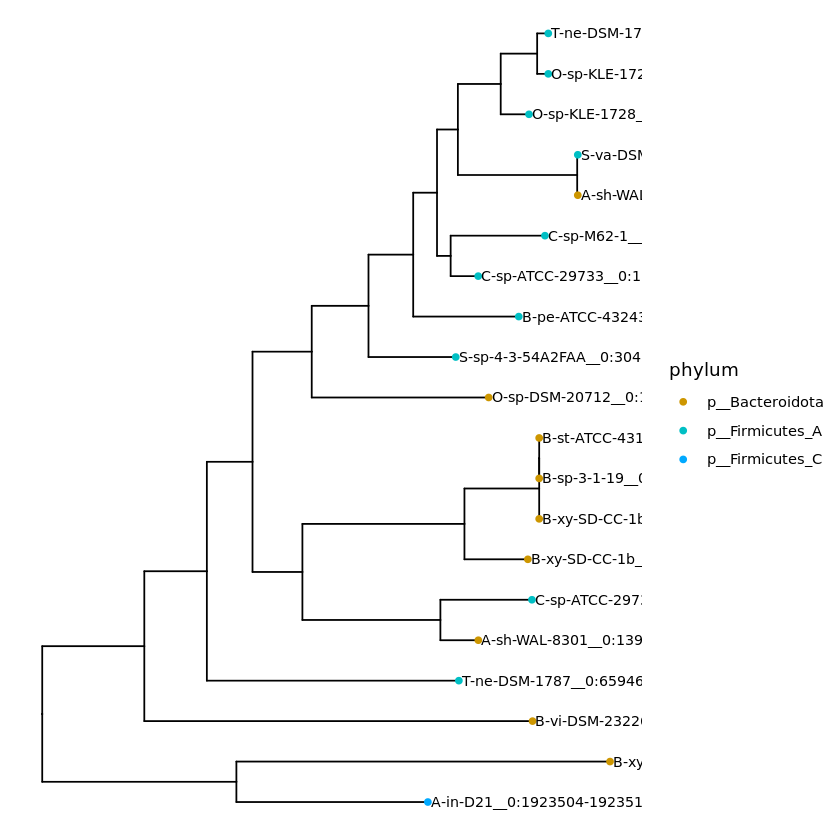

In [104]:
subInvertonTaxDf<-invertonTaxDf[((invertonTaxDf$inverton.group==as.character(145))),]
options(ignore.negative.edge=TRUE)
p <- ggtree(keep.tips(tree,subInvertonTaxDf$ID2)) %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = phylum))  +scale_color_manual(values=c('#CD9600','#00BFC4','#00A9FF'))+
  theme(legend.position = 'right') + geom_tiplab(aes(label=inverton.ID),size =3) 
p1
ggsave(file.path(workingDir,"figures","invertonsGroup145.pdf"),
       device = "pdf", width = 4, height = 2 , units = "in")


In [105]:
invertaseTree <- read.tree(file.path(workingDir,"data","trees","invertaseTree.dnd"))
invertaseTree


Phylogenetic tree with 3619 tips and 3617 internal nodes.

Tip labels:
  A-ca-DSM-14662_000295, T-ne-DSM-1787_003065, B-sp-KLE-1732_000521, D-fo-ATCC-27755_000643, C-eu-ATCC-27759_002652, M-fo-DSM-14469_003679, ...

Unrooted; includes branch lengths.

In [106]:
invertaseDf<-read.csv(file.path(workingDir,"data","supplementaryTables","TableS11.csv.gz"))


invertaseDf<-separate_wider_delim(invertaseDf, cols = chrom, delim = "__", names = c("abbrev", "pos"),cols_remove = FALSE)
invertaseDf<-merge(x = invertaseDf, y = strainDf, by = "abbrev", all.x = TRUE)
rownames(invertaseDf) <- invertaseDf$geneID
invertaseDf[,'invertase.group']=as.character(invertaseDf[,'invertase.group'])

cols<-colnames(invertaseDf)
cols<-cols[cols != "geneID"]
invertaseDf<-invertaseDf[,c('geneID',cols)]

invertaseDf

,geneID,abbrev,pos,chrom,start,end,strand,gene.annotation,invertase.group,nearby.inverton.ID,⋯,contigs,BioSample,BioProject,domain,phylum,class,order,family,genus,species
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A-ca-DSM-14662_000295,A-ca-DSM-14662_000295,A-ca-DSM-14662,0,A-ca-DSM-14662__0,279408,281379,+,recombinase family protein,146,,⋯,A-ca-DSM-14662__0,SAMN20222639,PRJNA746600,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Lachnospirales,f__Lachnospiraceae,g__Anaerostipes,s__Anaerostipes caccae
A-ca-DSM-14662_000307,A-ca-DSM-14662_000307,A-ca-DSM-14662,0,A-ca-DSM-14662__0,289290,290976,+,recombinase family protein,146,,⋯,A-ca-DSM-14662__0,SAMN20222639,PRJNA746600,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Lachnospirales,f__Lachnospiraceae,g__Anaerostipes,s__Anaerostipes caccae
A-ca-DSM-14662_000309,A-ca-DSM-14662_000309,A-ca-DSM-14662,0,A-ca-DSM-14662__0,291259,292936,-,recombinase family protein,146,,⋯,A-ca-DSM-14662__0,SAMN20222639,PRJNA746600,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Lachnospirales,f__Lachnospiraceae,g__Anaerostipes,s__Anaerostipes caccae
A-ca-DSM-14662_000338,A-ca-DSM-14662_000338,A-ca-DSM-14662,0,A-ca-DSM-14662__0,319346,320825,+,recombinase family protein,148,,⋯,A-ca-DSM-14662__0,SAMN20222639,PRJNA746600,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Lachnospirales,f__Lachnospiraceae,g__Anaerostipes,s__Anaerostipes caccae
A-ca-DSM-14662_000339,A-ca-DSM-14662_000339,A-ca-DSM-14662,0,A-ca-DSM-14662__0,320827,322411,+,recombinase family protein,146,,⋯,A-ca-DSM-14662__0,SAMN20222639,PRJNA746600,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Lachnospirales,f__Lachnospiraceae,g__Anaerostipes,s__Anaerostipes caccae
A-ca-DSM-14662_001104,A-ca-DSM-14662_001104,A-ca-DSM-14662,0,A-ca-DSM-14662__0,1122844,1123444,+,recombinase family protein,140,,⋯,A-ca-DSM-14662__0,SAMN20222639,PRJNA746600,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Lachnospirales,f__Lachnospiraceae,g__Anaerostipes,s__Anaerostipes caccae
A-ca-DSM-14662_001325,A-ca-DSM-14662_001325,A-ca-DSM-14662,0,A-ca-DSM-14662__0,1352028,1353078,+,recombinase RecA,22,,⋯,A-ca-DSM-14662__0,SAMN20222639,PRJNA746600,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Lachnospirales,f__Lachnospiraceae,g__Anaerostipes,s__Anaerostipes caccae
A-ca-DSM-14662_001834,A-ca-DSM-14662_001834,A-ca-DSM-14662,0,A-ca-DSM-14662__0,1859026,1860082,-,tyrosine-type recombinase/integrase,114,,⋯,A-ca-DSM-14662__0,SAMN20222639,PRJNA746600,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Lachnospirales,f__Lachnospiraceae,g__Anaerostipes,s__Anaerostipes caccae
A-ca-DSM-14662_001950,A-ca-DSM-14662_001950,A-ca-DSM-14662,0,A-ca-DSM-14662__0,1972977,1973421,-,recombinase family protein,146,,⋯,A-ca-DSM-14662__0,SAMN20222639,PRJNA746600,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Lachnospirales,f__Lachnospiraceae,g__Anaerostipes,s__Anaerostipes caccae


In [107]:
p<-ggtree(invertaseTree, layout="circular") %<+% invertaseDf
p1 <- p +
  geom_tippoint(aes(color = phylum))  +
  theme(legend.position = 'right')
p2 <- gheatmap(p1, invertaseDf[,c('gene.annotation','invertase.group')],
               width = 0.1, color = NA,offset=0) +scale_fill_manual(values=distinctColorPalette(length(unique(invertaseDf$gene.annotation))+length(unique(invertaseDf$invertase.group))))

ggsave(file.path(workingDir,"figures","invertaseTree.pdf"),
       device = "pdf", width = 30, height = 50 , units = "in",limitsize = FALSE)


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
